# Text Classification with 20 Newsgroups Dataset using RNN and LSTM

This notebook demonstrates how to perform text classification using both RNN and LSTM models on the 20 Newsgroups dataset.

### Step 1: Install TensorFlow

In [2]:
%%capture
!pip install tensorflow

### Step 2: Import Libraries

In [3]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Step 3: Load and Preprocess the Dataset

In [4]:
# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

# Preprocess the data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(newsgroups.data)
sequences = tokenizer.texts_to_sequences(newsgroups.data)
X = pad_sequences(sequences, maxlen=200)
y = to_categorical(newsgroups.target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 4: Build and Compile the RNN Model

In [11]:
# Build the RNN model
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=10000, output_dim=64, input_length=200))
rnn_model.add(SimpleRNN(units=64, return_sequences=False))
rnn_model.add(Dense(20, activation='softmax'))
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
sample_input = np.random.randint(10000, size=(1, 200))
rnn_model(sample_input)
rnn_model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (1, 200, 64)                │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ (1, 64)                     │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (1, 20)                     │           1,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 649,556 (2.48 MB)

 Trainable params: 649,556 (2.48 MB)

 Non-trainable params: 0 (0.00 B)

### Step 6: Train the RNN Model

In [12]:
# Train the RNN model
history_rnn = rnn_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))  # Small epochs

Epoch 1/5
236/236 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - accuracy: 0.1396 - loss: 2.8811 - val_accuracy: 0.2987 - val_loss: 2.3055
Epoch 2/5
236/236 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - accuracy: 0.5087 - loss: 1.9007 - val_accuracy: 0.4008 - val_loss: 1.9751
Epoch 3/5
236/236 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - accuracy: 0.7660 - loss: 1.0705 - val_accuracy: 0.4366 - val_loss: 1.9057
Epoch 4/5
236/236 ━━━━━━━━━━━━━━━━━━━━ 23s 94ms/step - accuracy: 0.9101 - loss: 0.5076 - val_accuracy: 0.4385 - val_loss: 2.0152
Epoch 5/5
236/236 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - accuracy: 0.9679 - loss: 0.2197 - val_accuracy: 0.4340 - val_loss: 2.1644


In [12]:
rnn_loss, rnn_acc = rnn_model.evaluate(X_test, y_test)
print(f'RNN Test Accuracy: {rnn_acc:.4f}')

118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4265 - loss: 2.1686
RNN Test Accuracy: 0.4302


### Step 5: Build and Compile the LSTM Model

In [14]:
# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=10000, output_dim=64, input_length=200))
lstm_model.add(LSTM(units=64, return_sequences=False))
lstm_model.add(Dense(20, activation='softmax'))
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
sample_input = np.random.randint(10000, size=(1, 200))
lstm_model(sample_input)
lstm_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ (1, 200, 64)                │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (1, 64)                     │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (1, 20)                     │           1,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 674,324 (2.57 MB)

 Trainable params: 674,324 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

### Step 7: Train the LSTM Model

In [15]:
# Train the LSTM model
history_lstm =  lstm_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
236/236 ━━━━━━━━━━━━━━━━━━━━ 37s 149ms/step - accuracy: 0.1150 - loss: 2.8493 - val_accuracy: 0.1873 - val_loss: 2.4439
Epoch 2/5
236/236 ━━━━━━━━━━━━━━━━━━━━ 34s 142ms/step - accuracy: 0.3042 - loss: 2.1459 - val_accuracy: 0.3440 - val_loss: 2.0747
Epoch 3/5
236/236 ━━━━━━━━━━━━━━━━━━━━ 43s 150ms/step - accuracy: 0.4392 - loss: 1.8043 - val_accuracy: 0.4048 - val_loss: 1.7869
Epoch 4/5
236/236 ━━━━━━━━━━━━━━━━━━━━ 33s 141ms/step - accuracy: 0.5131 - loss: 1.5163 - val_accuracy: 0.4605 - val_loss: 1.6400
Epoch 5/5
236/236 ━━━━━━━━━━━━━━━━━━━━ 43s 148ms/step - accuracy: 0.6343 - loss: 1.1651 - val_accuracy: 0.5578 - val_loss: 1.3224


### Step 8: Evaluate the Models

In [16]:
# Evaluate the models
rnn_eval = rnn_model.evaluate(X_test, y_test)
lstm_eval = lstm_model.evaluate(X_test, y_test)

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4300 - loss: 2.1866
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5500 - loss: 1.3524


### Step 9: Plot the Training and Validation Accuracy/Loss

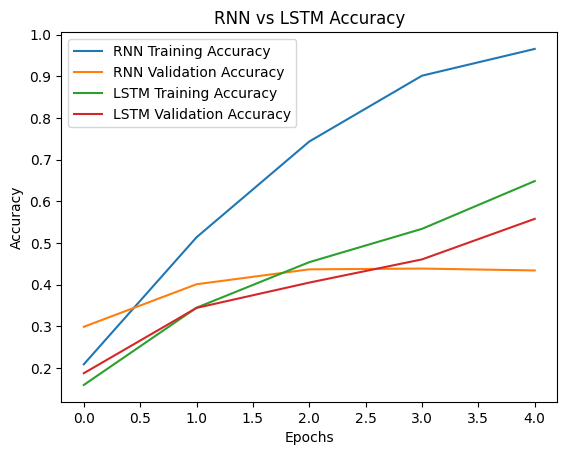

In [17]:
plt.plot(history_rnn.history['accuracy'], label='RNN Training Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='RNN Validation Accuracy')
plt.plot(history_lstm.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.title('RNN vs LSTM Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Step 10: Classify a Sample Text

In [24]:
def preprocess_sample_text(sample_text, tokenizer, max_length=200):
    sequence = tokenizer.texts_to_sequences([sample_text])
    padded_sequence = pad_sequences(sequence, maxlen=max_length)
    return padded_sequence

def classify_sample_text(model, sample_text, tokenizer, class_names):
    preprocessed_text = preprocess_sample_text(sample_text, tokenizer)
    prediction = model.predict(preprocessed_text)
    predicted_class_idx = np.argmax(prediction, axis=1)[0]
    predicted_class_name = class_names[predicted_class_idx]
    return predicted_class_name

class_names = newsgroups.target_names
sample_text = "The movie was terrible. The plot was confusing and the acting was bad. I would not recommend it to anyone."

# Here is classify by the RNN model
predicted_rnn_class = classify_sample_text(rnn_model, sample_text, tokenizer, class_names)
print(f'RNN Model Prediction: {predicted_rnn_class}')

# Here is classify by the LSTM model
predicted_lstm_class = classify_sample_text(lstm_model, sample_text, tokenizer, class_names)
print(f'LSTM Model Prediction: {predicted_lstm_class}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
RNN Model Prediction: talk.politics.misc
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
LSTM Model Prediction: rec.sport.hockey


#**Well done =)**